In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

### Exercise 4.15
#### Part (i)
Numerically take a draw $\mathbf{x}$ of length 300 from the standard normal, compute the empirical distribution $\hat{F}_n(t)$ and a 95% confidence band for the c.d.f. $F_X(t)$ (using Corollary 4.3.10).  Identify whether the true c.d.f. ever leaves that confidence band (say for $t \in (-20, 20)$).

In [2]:
def part1(X=stats.norm(0,1), n=300, alpha=.05, return_arrays=False):
    
    #take the draw
    x = X.rvs(n)
    
    #compute the empirical distribution.
    F_x = lambda t : (x.reshape((-1,1)) <= t).mean(axis=0)
    
    #Make a 95% confidence band for X.cdf
    epsilon = np.sqrt(np.log(2/alpha)/(2*n))
    L = lambda t : np.max(np.vstack((F_x(t) - epsilon, np.zeros_like(t))), axis=0)
    U = lambda t : np.min(np.vstack((F_x(t) + epsilon, np.ones_like(t))), axis=0)
    
    #See if we leave while -20 < t <20
    ts = np.linspace(-20, 20, 10000)
    upper_band = U(ts)
    lower_band = L(ts)
    true_cdf = X.cdf(ts)
    
    cdf_left = np.any(true_cdf > upper_band) or np.any(true_cdf < lower_band)
    
    if return_arrays:
        return cdf_left, ts, true_cdf, upper_band, lower_band
    else:
        return cdf_left

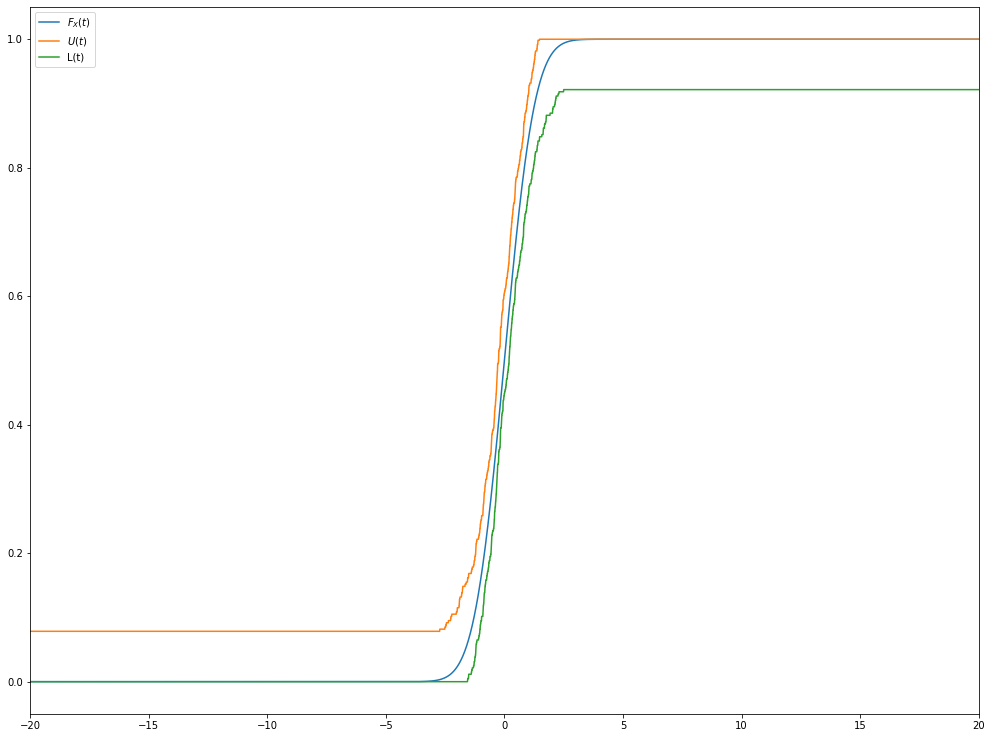

The cdf stayed in the confidence band.


In [3]:
left, t, cdf, up, low = part1(return_arrays=True)

plt.figure(figsize=(17, 13))
for y, name in zip([cdf, up, low], ["$F_X(t)$", "$U(t)$", "L(t)"]):
    plt.plot(t, y, label=name)
    
plt.legend()
plt.xlim((-20, 20))
plt.show()
if left:
    print("The cdf left the confidence band.")
else:
    print("The cdf stayed in the confidence band.")

### Part (ii)
Repeat the previous computation 100 times and identify what percent of the time the true c.d.f. leaves the confidence band.

In [4]:
def part2(X=stats.norm(0,1), repeats=100, num_samples=300, alpha=.05):
    
    times_left = 0
    for dummy in range(repeats):
        left = part1(X=X,  n=num_samples, alpha=alpha)
        if left:
            times_left += 1
    
    print("With {0} repeats the cdf left the {1}% confidence band {2}% of the time.".format(
                repeats, 100*(1-alpha), 100*times_left/repeats))
    

In [5]:
part2()

With 100 repeats the cdf left the 95.0% confidence band 4.0% of the time.


### Part (iii)
Repeat the previous steps for the Cauchy distribution instead of the standard normal.


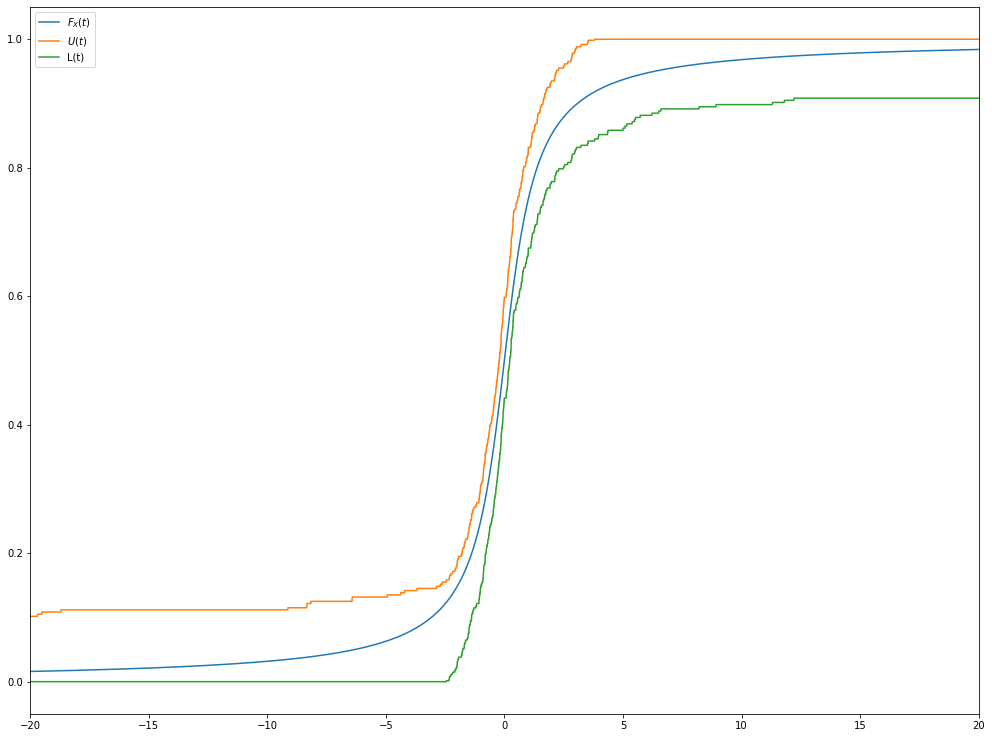

The cdf stayed in the confidence band.


In [6]:
Cauchy = stats.t(1)

left, t, cdf, up, low = part1(X=Cauchy, return_arrays=True)

plt.figure(figsize=(17, 13))
for y, name in zip([cdf, up, low], ["$F_X(t)$", "$U(t)$", "L(t)"]):
    plt.plot(t, y, label=name)
    
plt.legend()
plt.xlim((-20, 20))
plt.show()
if left:
    print("The cdf left the confidence band.")
else:
    print("The cdf stayed in the confidence band.")

In [7]:
part2(X=Cauchy)

With 100 repeats the cdf left the 95.0% confidence band 3.0% of the time.
